<h1 align = 'center'>Face Recognition with Principal Component Analysis (PCA): A Step-by-Step Implementation from Scratch</h1>
<div align = 'center'><i>Assignment in DA311 (Machine Learning Lab), IIT Guwahati</i></div>

## 1. Why is PCA used in Face Recognition?
In face recognition, images of faces are typically high-dimensional data, with each pixel representing a feature. These high-dimensional data can be computationally expensive to work with and may lead to overfitting. PCA helps reduce the dimensionality of the data by transforming it into a lower-dimensional space while retaining as much variance as possible. This reduction in dimensionality simplifies subsequent processing steps and improves computational efficiency.

# Imports

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

# Task 1

The  gallery folder “Gallery.zip” contains images from 40 individuals, each of them  providing 5 images. The pixel intensities of the 200 face images will be used for computing the KL Transform. By employing the method of efficient computation of the basis vectors for high dimensional data

1. Display the Eigenface images corresponding to the top 6 Eigenvalues of the covariance matrix Σ.
2. Plot a graph depicting the percentage of the total variance of the original data retained in the reduced space versus the number of dimensions. From this  graph, find the number of dimensions required for projecting the face vectors so that:
    1. At  least  85%  of  the  total  variance  of  the  original  data  is  accounted  for  in  the  reduced space.
    2. At  least  95%  of  the  total  variance  of  the  original  data  is  accounted  for  in  the  reduced space.
3. Reconstruct an image from Gallery (train set) using the:
    1.  Eigenface corresponding to the largest eigenvalue.
    2.  Top 4 Eigenfaces.
    3.  Top 15 Eigenfaces.
    4.  Top 150 Eigenfaces.
    5.  All the Eigenfaces.
  Display the reconstructed image and the mean squared error in each case.
4.  Depict graphically the mean squared error obtained for different numbers of Eigenfaces. Note that the Eigenfaces will vary from 1 to 199 (total number of training samples-1).
5. Repeat parts (iii) and (iv) for an image from Probe (test set). Comment on your results.

In [2]:
## Image Folder Paths
GALLERY = "/kaggle/input/database-of-faces/Gallery/Gallery"
PROBE = "/kaggle/input/database-of-faces/Probe/Probe"

In [3]:
## Storing Images and corresponding labels
images = list()
labels = list()
for folder in os.listdir(GALLERY):
    for img in os.listdir(GALLERY + "/" + folder):
        img = Image.open(GALLERY + "/" + folder + "/" + img)
        labels.append(int(folder.split("s")[1]))
        images.append(np.array(img))

# Mean Centering

## Why Mean Centering?
Mean centering helps remove spurious correlations in the data. When you compute the covariance matrix or correlation matrix to perform PCA, the presence of the mean value in each feature can lead to misleading correlations. By centering the data, you ensure that the origin of the coordinate system corresponds to the mean of the data, which helps in capturing the true relationships between variables. **Also, it allows us to use the Covariance Matrix trick mentioned later.**

In [4]:
# Resizing images in the form of a vector and subtracting mean from each
shape = images[0].shape
X = np.resize(images,(len(images), shape[0]*shape[1]))
mean = np.mean(X, axis = 0)
X_std = X - mean

In [5]:
# m x d where m represents number of training samples and d represents all dimensions of the image
X_std.shape

(200, 10304)

# Eigendecomposition of the Covariance Matrix

## Covariance Matrix Trick with XX^T

The covariance matrix trick is a technique used in statistics and machine learning for handling high-dimensional data efficiently. Instead of computing the covariance matrix as $X^TX$, it can be computed as $XX^T$. Here's a brief explanation:

1. **High-Dimensional Data**: In high-dimensional spaces, you often have many features (dimensions) compared to the number of data points. This can lead to computational challenges and issues like multicollinearity.

2. **Covariance Matrix**: The covariance matrix summarizes the relationships between pairs of features in your data. Traditionally, it is computed as $X^TX$, where $X$ is your data matrix.

3. **Covariance Matrix Trick**: Instead of using $X^TX$, you can compute the covariance matrix as $XX^T$. The dimensions of this matrix will be $(n \times n)$, where $n$ is the number of data points. This covariance matrix has the same eigenvalues as the original covariance matrix $X^TX$, and its eigenvectors are related to those of $X^TX$ as follows:

   - **Eigenvalues**: The eigenvalues of $XX^T$ are the same as those of $X^TX$. These eigenvalues represent the variances of the data along the corresponding principal components.
   
   - **Eigenvectors**: The eigenvectors of $XX^T$ can be transformed to obtain the eigenvectors of $X^TX$. This transformation involves multiplying the eigenvectors of $XX^T$ by $X^T$. These eigenvectors are the directions in the original feature space along which the data varies the most.

   Advantages:
   - Efficient: Computing $XX^T$ can be more efficient in terms of computation and memory, especially for high-dimensional data.
   - Numerical Stability: It can be numerically more stable, particularly when your data has features with different scales.

4. **Application**: After obtaining the covariance matrix using $XX^T$, you can proceed with various statistical analyses or machine learning tasks. You can also retrieve the original eigenvectors and eigenvalues by transforming the eigenvectors of $XX^T$ as mentioned above.

In summary, the covariance matrix trick with $XX^T$ is a useful approach for efficiently handling high-dimensional data, offering computational and numerical advantages. It allows you to retrieve the original eigenvectors and eigenvalues, which are valuable for understanding the data's principal components and variances.


In [6]:
# IMPORTANT, cov matrix here is of dimension m x m instead of the standard d x d
cov_mat = X_std @ X_std.T

In [7]:
# m x m
cov_mat.shape

(200, 200)

In [8]:
# Eigendecomposition of the covariance matrix followed by sorting of the eigenvectors in decreasing order of the eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [9]:
# Extracting the eigenvectors of the actual covariance matrix from the converted covariance matrix
eigenvector_converted = X_std.T @ eigenvectors
eigenvector_converted.shape

(10304, 200)

In [10]:
# Normalizing the eigenvectors (making them unit norm)
eigenfaces = eigenvector_converted.T/ np.sqrt((eigenvector_converted.T ** 2).sum(axis=1, keepdims=True))
eigenfaces.shape

(200, 10304)

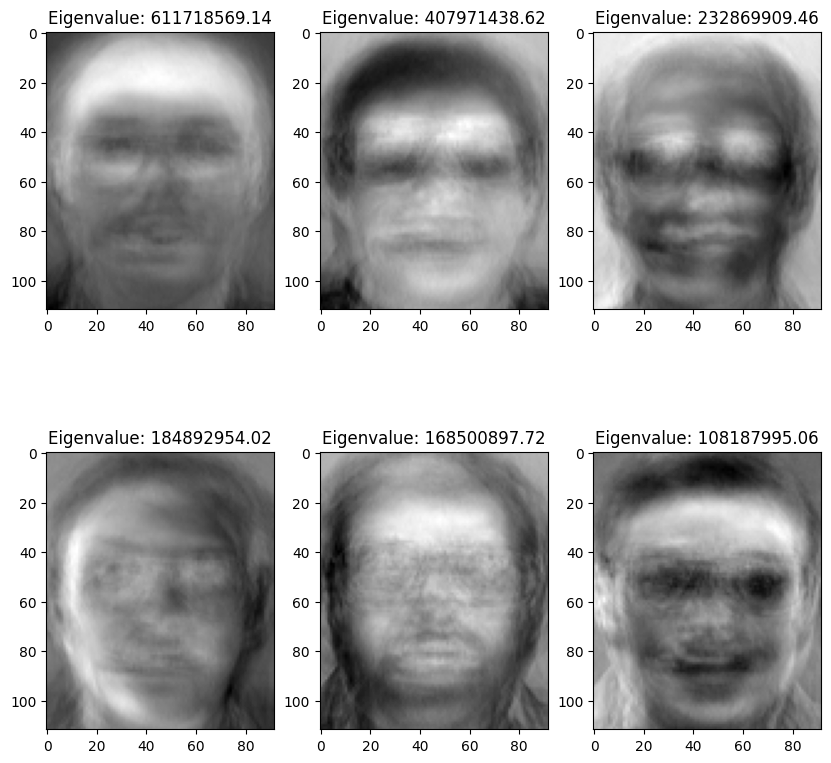

In [11]:
# Displaying the Eigenface images corresponding to the top 6 Eigenvalues of the covariance matrix Σ.
_, axs = plt.subplots(2, 3, figsize=(10, 10))
axs = axs.flatten()
for i, (img, ax) in enumerate(zip(eigenfaces, axs)):
    ax.set_title(f"Eigenvalue: {np.round(eigenvalues[i], 2)}")
    ax.imshow(img.reshape(shape[0], shape[1]), cmap="gray")
plt.show()

In [12]:
# Last Eigenvalue is approximately 0
eigenvalues[-1]

-7.488454677178664e-09

# Explained Variance in PCA

Explained variance in Principal Component Analysis (PCA) represents the proportion of the total variance in a dataset that is accounted for by each principal component (PC). In PCA, data is transformed into a new set of orthogonal variables (principal components) that are linear combinations of the original features. These principal components are ordered by the amount of variance they explain, with the first PC explaining the most variance, the second PC explaining the second most, and so on. **These variances are proportional to the eigenvalues.**

The explained variance of a principal component tells us how much of the variability in the data is captured by that component. It's typically expressed as a percentage, and you can calculate it by dividing the variance of a specific PC by the total variance of the original data. Understanding the explained variance is crucial for dimensionality reduction and selecting the appropriate number of principal components to retain, as it helps you assess how much information is retained while reducing the dimensionality of the data.

In [13]:
# Calculate the total sum of eigenvalues, which represent the total variance in the data
total = sum(eigenvalues)

# Calculate the explained variance for each eigenvalue as a percentage of the total variance
explained_variance = [(i / total) * 100 for i in eigenvalues]
explained_variance = np.round(explained_variance, 2)

# Calculate the cumulative explained variance by taking the cumulative sum of the explained variance values
cum_explained_variance = np.cumsum(explained_variance)

In [14]:
# Initialize an empty list 'x' to store the dimensions that satisfy the explained variance thresholds
x = list()

# Define the desired cumulative explained variance thresholds in 'y'
y = [85, 95]

for dim in range(200):
    # Check if the cumulative explained variance for the current dimension
    # is greater than or equal to the first threshold (y[0])
    if cum_explained_variance[dim] >= y[0]:
        x.append(dim+1)
        break

for dim in range(x[0]+1, 200):
    # Check if the cumulative explained variance for the current dimension
    # is greater than or equal to the second threshold (y[1])
    if cum_explained_variance[dim] >= y[1]:
        x.append(dim+1)
        break

In [15]:
# Number of dimensions accounting for 85% and 95% of the total variance of the original data in the reduced space
x

[47, 110]

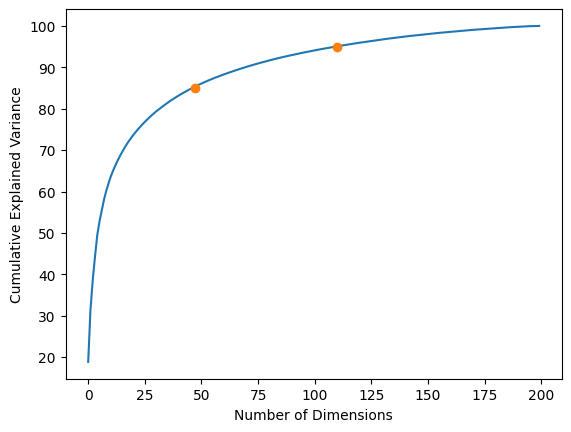

In [16]:
# A graph depicting the percentage of the total variance of the original data retained in the reduced space versus the number of dimensions.
plt.plot(cum_explained_variance)
plt.plot(x, y, "o")
plt.xlabel("Number of Dimensions")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# Projection and Reconstruction

Projection and reconstruction are fundamental concepts in Principal Component Analysis (PCA) when applied to images:

1. **Projection**:
   - In PCA, projection refers to the process of transforming high-dimensional data (such as images represented as pixel values) onto a lower-dimensional subspace defined by its principal components.
   - The principal components are orthogonal vectors that capture the directions of maximum variance in the original data. By projecting the data onto these components, you obtain a set of coefficients that represent the contribution of each component to the original data.
   - In image PCA, projecting an image onto the principal components results in a compressed representation of the image using fewer components. This reduces the dimensionality while retaining the most significant information.

2. **Reconstruction**:
   - Reconstruction is the process of taking the lower-dimensional representation (obtained through projection) and mapping it back to the original high-dimensional space.
   - To reconstruct an image from its lower-dimensional representation, you multiply the coefficients obtained during projection by the corresponding principal components and add them together. This process recreates an approximation of the original image.
   - The quality of the reconstruction depends on the number of principal components used. More components lead to a more faithful representation, while fewer components result in a loss of detail.
   
In summary, PCA allows you to reduce the dimensionality of images by projecting them onto a lower-dimensional subspace defined by principal components. You can then reconstruct an approximation of the original image from this reduced representation.

## Train Set

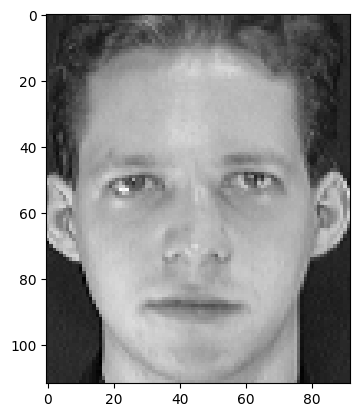

In [17]:
train_img = np.array(Image.open(GALLERY + "/" + "s1/1.pgm"))
train_image_mean_centered = train_img.reshape(shape[0]*shape[1]) - mean
plt.imshow(train_img, cmap = 'gray')
plt.show()

Reconstruction errors: (MSE)
1 eigenfaces: 13168352.762518015
4 eigenfaces: 7596138.23835166
15 eigenfaces: 4745365.442659535
150 eigenfaces: 203638.7318671773
199 eigenfaces: 1.81635265322594e-18
200 eigenfaces: 99980.29671943084


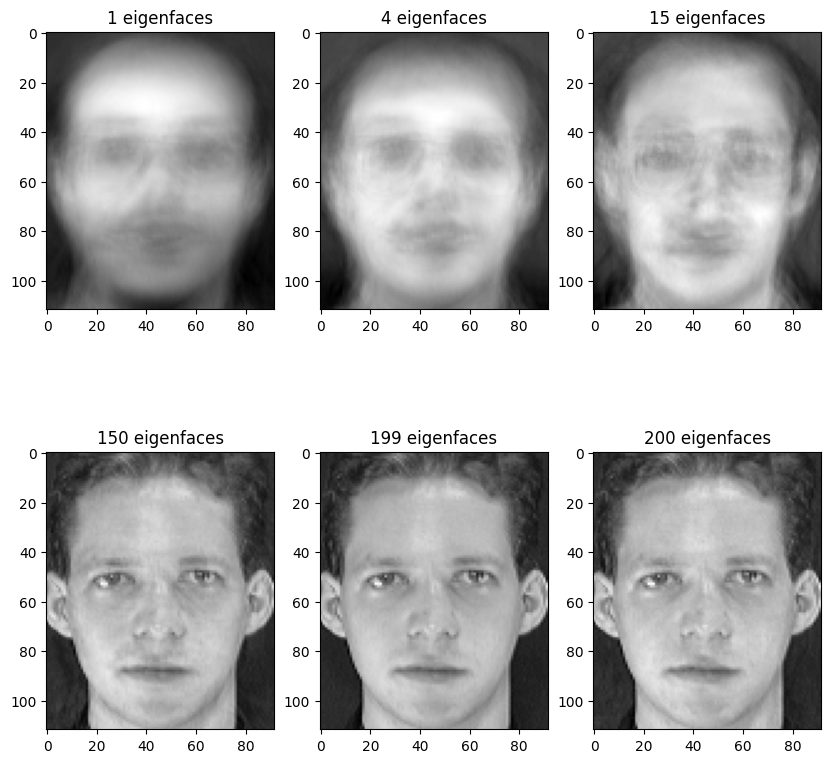

In [18]:
_, axs = plt.subplots(2, 3, figsize=(10, 10))
axs = axs.flatten()
# Define a list of indices 'count' indicating the number of eigenfaces to use for reconstruction
count = [1, 4, 15, 150, 199, 200]
print("Reconstruction errors: (MSE)")
for i, (img, ax) in enumerate(zip(eigenfaces, axs)):
    # Calculate the reconstruction using the selected number of eigenfaces
    E = eigenfaces[:count[i]].dot(train_image_mean_centered)
    reconstruction = eigenfaces[:count[i]].T.dot(E) + mean
    
    # Calculate the difference between the original and reconstructed images
    diff = train_image_mean_centered + mean - reconstruction
    
    # Calculate the Mean Squared Error (MSE) as the reconstruction error
    error = np.dot(diff, diff)
    print(str(count[i]) + " eigenfaces: " + str(error))
    
    # Display the reconstructed image in grayscale
    ax.set_title(str(count[i]) + " eigenfaces")
    ax.imshow(np.reshape(reconstruction, (shape[0], shape[1])), cmap='gray')
plt.show()

## Test Set

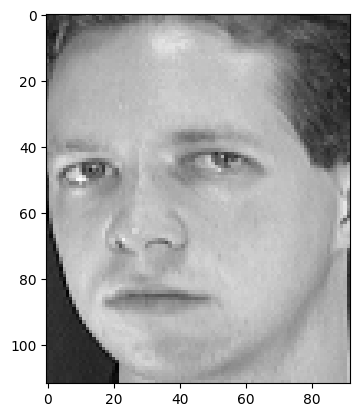

In [19]:
test_img = np.array(Image.open(PROBE + "/" + "s1/6.pgm"))
test_image_mean_centered = test_img.reshape(shape[0]*shape[1]) - mean
plt.imshow(test_img.reshape(shape[0], shape[1]), cmap = 'gray')
plt.show()

Reconstruction errors: (MSE)
1 eigenfaces: 18209665.52881308
4 eigenfaces: 16066909.25969879
15 eigenfaces: 8212525.009915357
150 eigenfaces: 3653232.2565992214
199 eigenfaces: 3438031.2777649667
200 eigenfaces: 3532006.1587156034


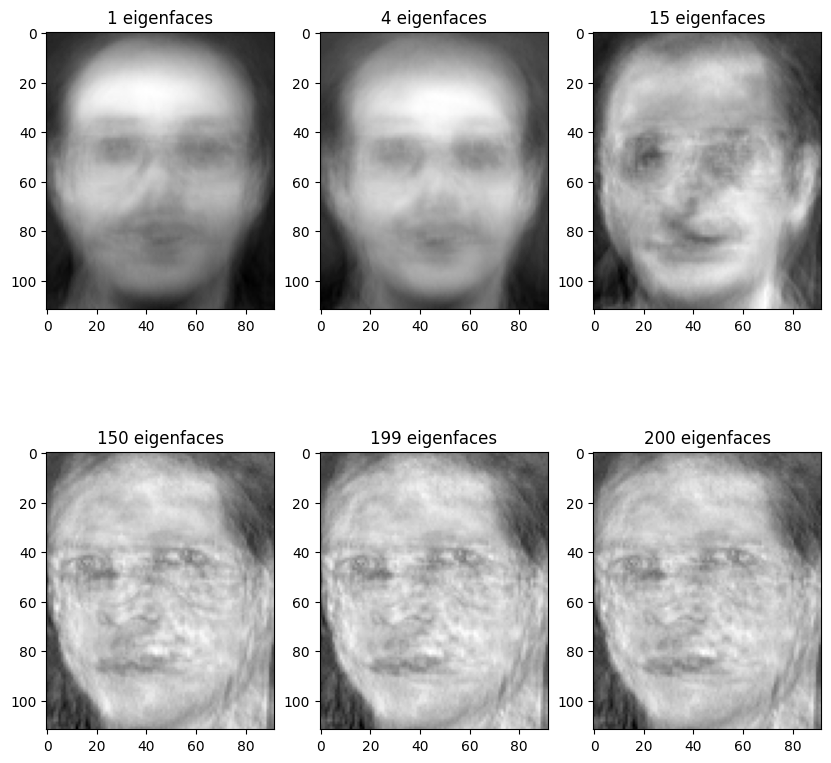

In [20]:
_, axs = plt.subplots(2, 3, figsize=(10, 10))
axs = axs.flatten()
# Define a list of indices 'count' indicating the number of eigenfaces to use for reconstruction
count = [1, 4, 15, 150, 199, 200]
print("Reconstruction errors: (MSE)")
for i, (img, ax) in enumerate(zip(eigenfaces, axs)):
    # Calculate the reconstruction using the selected number of eigenfaces
    E = eigenfaces[:count[i]].dot(test_image_mean_centered)
    reconstruction = eigenfaces[:count[i]].T.dot(E) + mean
    
    # Calculate the difference between the original and reconstructed images
    diff = test_image_mean_centered + mean - reconstruction
    
    # Calculate the Mean Squared Error (MSE) as the reconstruction error
    error = np.dot(diff, diff)
    print(str(count[i]) + " eigenfaces: " + str(error))
    
    # Display the reconstructed image in grayscale
    ax.set_title(str(count[i])+" eigenfaces")
    ax.imshow(np.reshape(reconstruction,(shape[0],shape[1])),cmap='gray')
plt.show()

## Question: Why perfect reconstruction is possible in Train set images but not in test set images?

## Trend of Reconstruction error vs Number of Dimensions used for Reconstruction

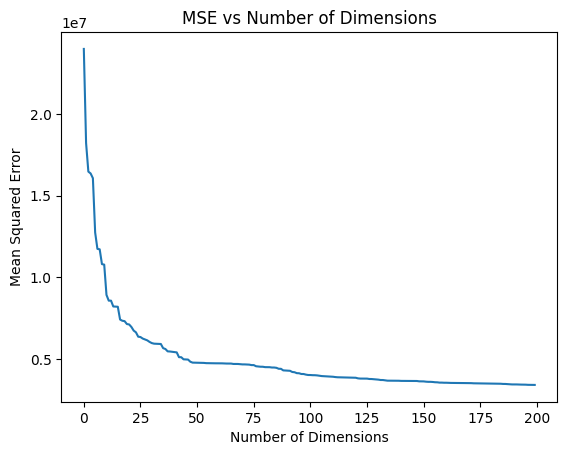

In [21]:
errors = list()
for i in range(200):
    # Project the test image onto the first 'i' principal components
    E = eigenfaces[:i].dot(test_image_mean_centered)
    
    # Reconstruct the test image using the selected number of dimensions
    reconstruction = eigenfaces[:i].T.dot(E) + mean
    
    # Calculate the difference between the original test image and the reconstructed image
    diff = test_image_mean_centered + mean - reconstruction
    
    # Calculate the Mean Squared Error (MSE) as the reconstruction error
    error = np.dot(diff, diff)
    errors.append(error)

# Plot the MSE values against the number of dimensions used for reconstruction
plt.plot(errors)
plt.title("MSE vs Number of Dimensions")
plt.xlabel("Number of Dimensions")
plt.ylabel("Mean Squared Error")
plt.show()

# Task 2

The test image folder **Probe** contains 5 images of each of the 40 individuals.
1. Classify the test samples in this folder using a 1-nearest neighbor classifier (with Euclidean distance) in a reduced 25-dimensional subspace. Compute the classification accuracy.
2. Depict graphically the recognition accuracies obtained for different numbers of dimensions. For this part, you have to vary the dimensions from 1 to 199 (total number of training samples).

In [22]:
# Initialize empty lists to store the lower-dimensional representations (E) of test and train images
testE = list()  # For test images
trainE = list()  # For train images

# Iterate through folders in the PROBE directory (presumably containing test images)
for folder in os.listdir(PROBE):
    # Iterate through image files within each folder
    for img in os.listdir(PROBE + "/" + folder):
        # Load and convert the image to a NumPy array
        img = np.array(Image.open(PROBE + "/" + folder + "/" + img))
        
        # Compute the mean-centered image by subtracting the mean image
        img_mean_centered = img.reshape(shape[0] * shape[1]) - mean
        
        # Project the mean-centered test image onto the first 199 principal components
        testE.append(eigenfaces[:199].dot(img_mean_centered))

# Iterate through folders in the GALLERY directory (presumably containing train images)
for folder in os.listdir(GALLERY):
    # Iterate through image files within each folder
    for img in os.listdir(GALLERY + "/" + folder):
        # Load and convert the image to a NumPy array
        img = np.array(Image.open(GALLERY + "/" + folder + "/" + img))
        
        # Compute the mean-centered image by subtracting the mean image
        img_mean_centered = img.reshape(shape[0] * shape[1]) - mean
        
        # Project the mean-centered train image onto the first 199 principal components
        trainE.append(eigenfaces[:199].dot(img_mean_centered))


In [23]:
def predictSingle(img, total, q = 25):
    smallest_value =None
    index = None 
    E = testE[total-1][:q]
    for i, image in enumerate(images):
        E_compare = trainE[i][:q]
        diff = E-E_compare
        eps = np.sqrt(np.dot(diff, diff))
        if smallest_value==None:
            smallest_value=eps
            index = labels[i]
        if smallest_value>eps:
            smallest_value=eps
            index=labels[i]
    return index

In [24]:
def predict(q = 25):
    total = 0
    correct = 0
    for folder in os.listdir(PROBE):
        for img in os.listdir(PROBE + "/" + folder):
            img = np.array(Image.open(PROBE + "/" + folder + "/" + img))
            total += 1
            if(predictSingle(img, total, q) == int(folder.split("s")[1])):
                correct += 1
    return correct/total

In [25]:
partA = predict()
print("Classification Accuracy: ", partA)

Classification Accuracy:  0.87


In [26]:
accs = list()
for q in range(1, 200):
    accs.append(predict(q))

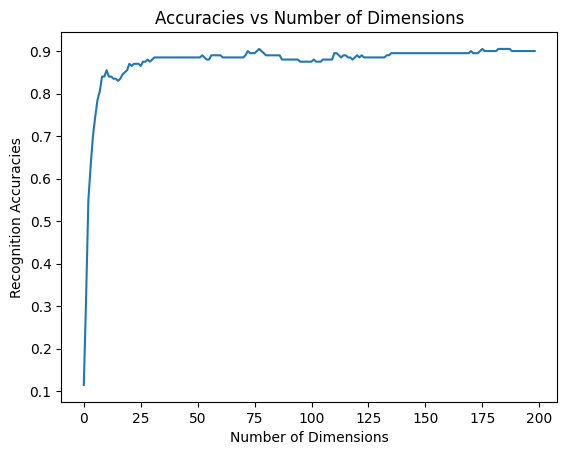

In [27]:
plt.plot(accs)
plt.title("Accuracies vs Number of Dimensions")
plt.xlabel("Number of Dimensions")
plt.ylabel("Recognition Accuracies")
plt.show()